In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Define dataset paths
# dataset = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/'
dataset = 'E:/Plant Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/'
train_dir = dataset + 'train/'
valid_dir = dataset + 'valid/'


In [8]:
# Get class names
disease_classes = sorted(os.listdir(train_dir))
print(f"\n Classes:\n{disease_classes}")


 Classes:
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato_

In [9]:
# Extract plant names and count diseases
plants = set()
total_diseases = 0
for disease in disease_classes:
    plant, status = disease.split('___')
    plants.add(plant)
    if status != 'healthy':
        total_diseases += 1

print(f"\nPlants: {sorted(plants)}")
print(f'Total number of classes: {len(disease_classes)}')
print(f'Total number of plants: {len(plants)}')
print(f'Total number of diseases (excluding healthy): {total_diseases}')




Plants: ['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']
Total number of classes: 38
Total number of plants: 14
Total number of diseases (excluding healthy): 26


In [10]:

# Count number of images per class
img_cnt = {}
for disease in disease_classes:
    img_cnt[disease] = len(os.listdir(os.path.join(train_dir, disease)))



In [11]:
# Convert to DataFrame
image_count = pd.DataFrame({
    'Disease_Class': list(img_cnt.keys()),
    'No_of_Images': list(img_cnt.values())
})


In [12]:
# Add plant name and status as separate columns
image_count['Plant'] = image_count['Disease_Class'].apply(lambda x: x.split('___')[0])
image_count['Status'] = image_count['Disease_Class'].apply(lambda x: x.split('___')[1])



In [13]:
# Sort by number of images
image_count = image_count.sort_values(by='No_of_Images', ascending=False).reset_index(drop=True)

C:\Users\vbhar\AppData\Local\Temp\ipykernel_19040\1910164458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=image_count, x='Disease_Class', y='No_of_Images', palette='viridis')


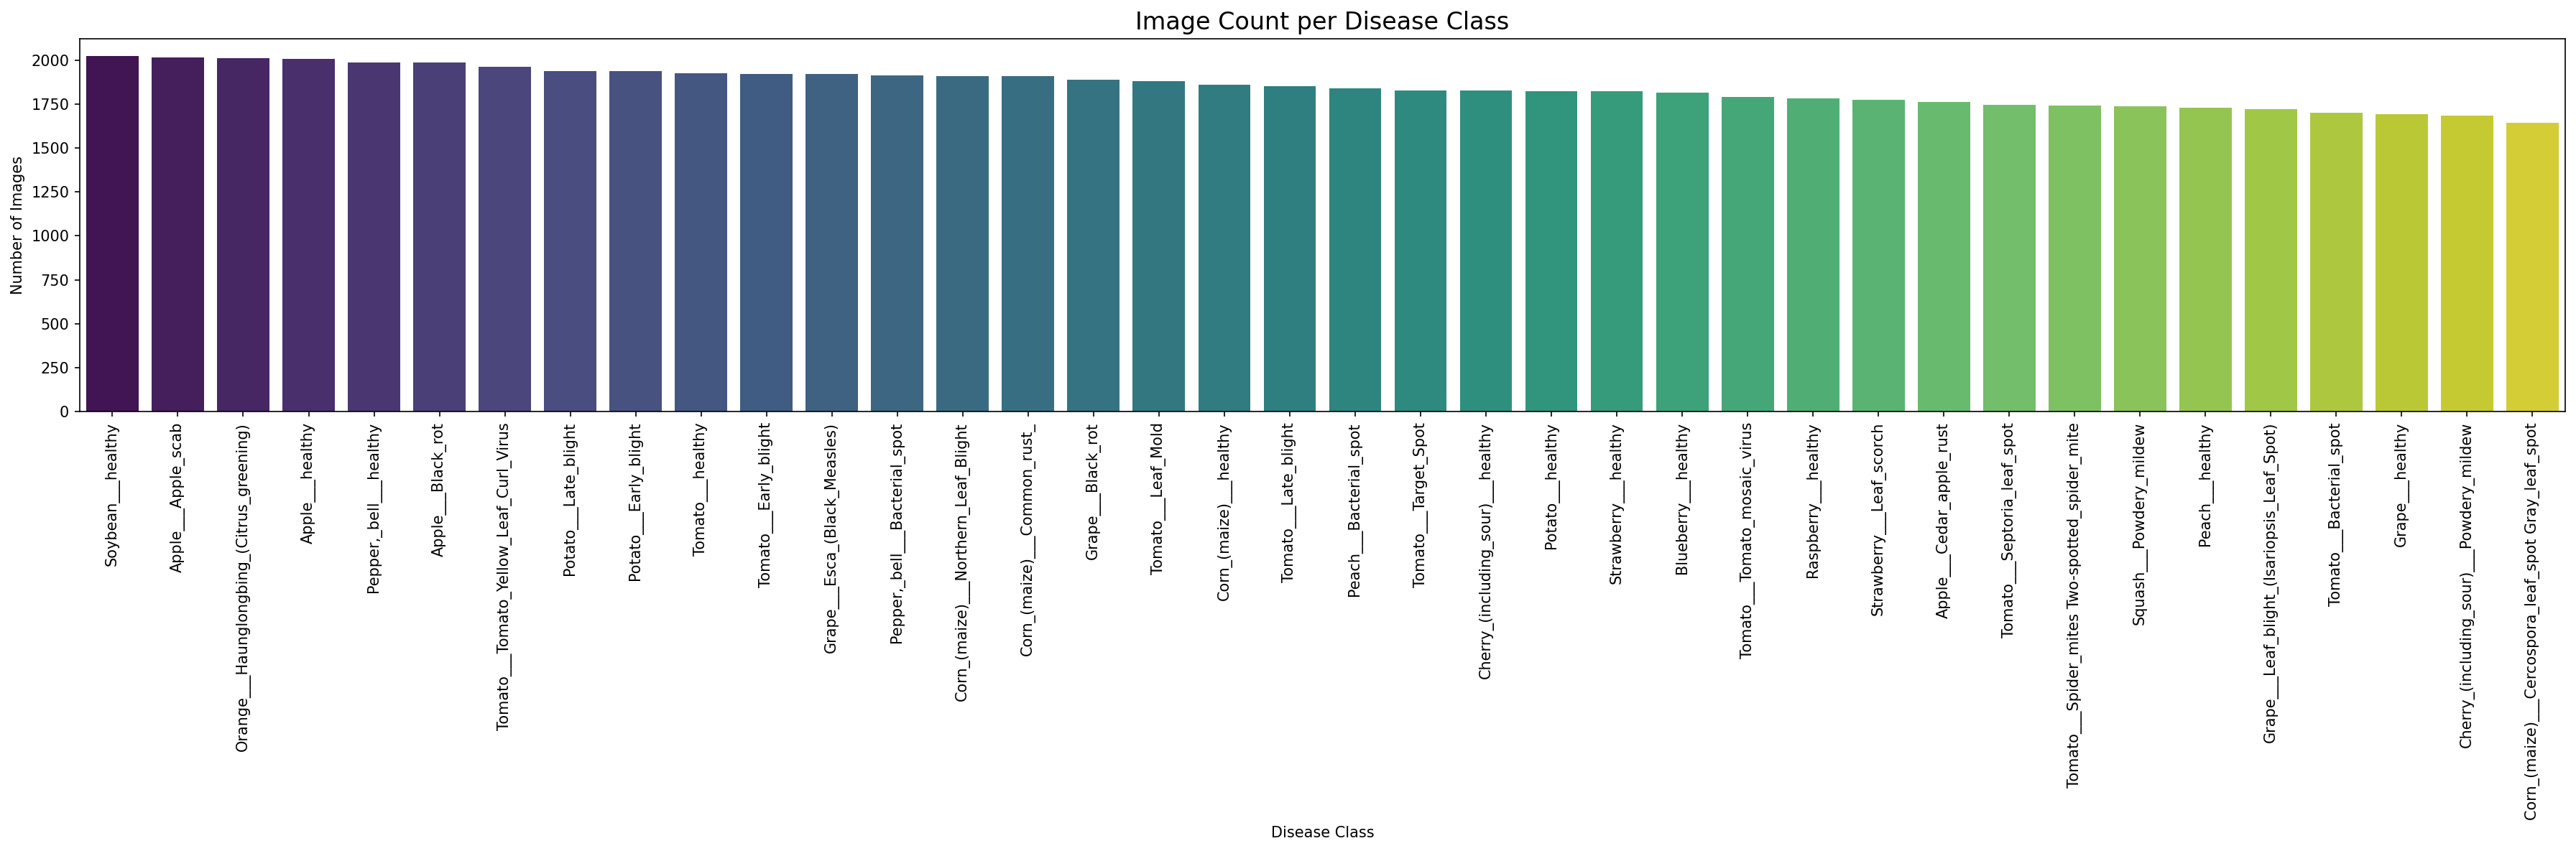

In [14]:
# Visualization 1: Number of Images per Disease Class
plt.figure(figsize=(24, 8), dpi=150)
sns.barplot(data=image_count, x='Disease_Class', y='No_of_Images', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Disease Class')
plt.ylabel('Number of Images')
plt.title('Image Count per Disease Class', fontsize=16)
plt.tight_layout()
plt.show()



C:\Users\vbhar\AppData\Local\Temp\ipykernel_19040\3929459896.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plant_img_count.index, y=plant_img_count.values, palette='crest')


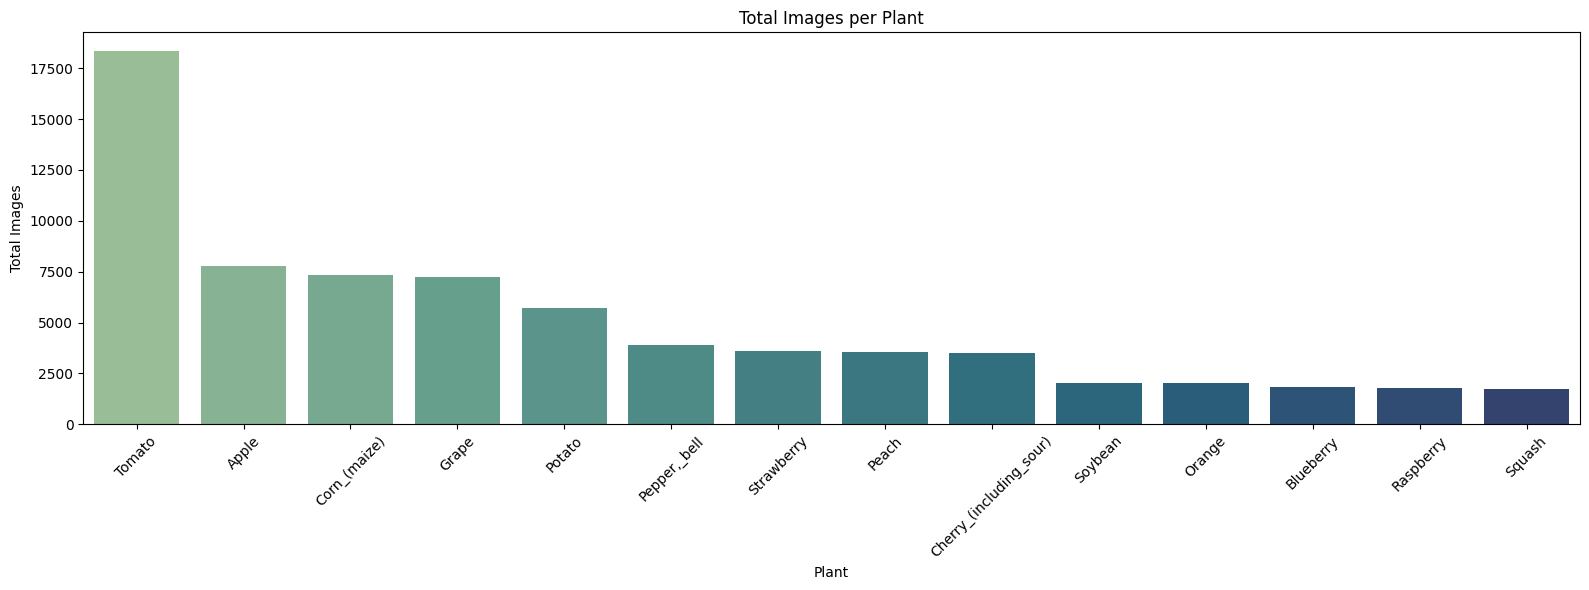

In [15]:
# Visualization 2: Total Images per Plant
plant_img_count = image_count.groupby('Plant')['No_of_Images'].sum().sort_values(ascending=False)
plt.figure(figsize=(16, 6))
sns.barplot(x=plant_img_count.index, y=plant_img_count.values, palette='crest')
plt.xticks(rotation=45)
plt.xlabel('Plant')
plt.ylabel('Total Images')
plt.title('Total Images per Plant')
plt.tight_layout()
plt.show()


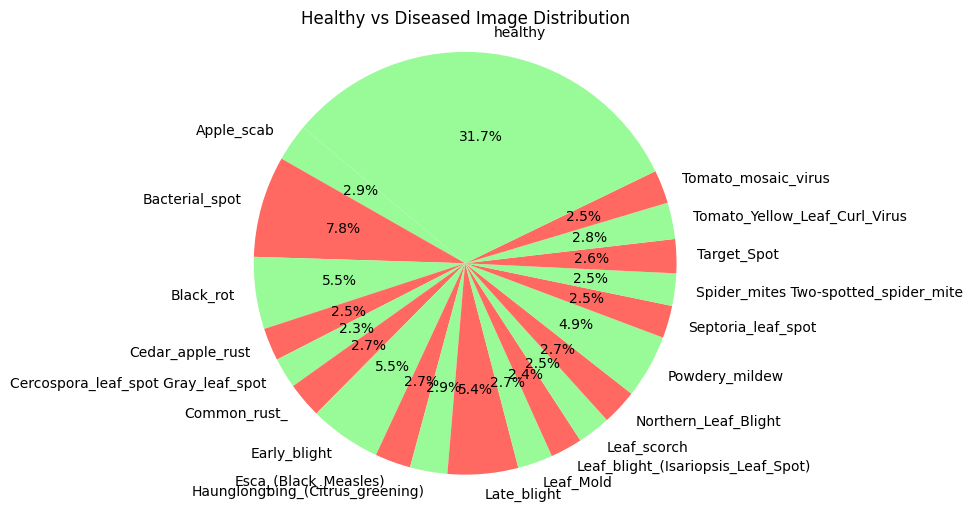

In [16]:
# Visualization 3: Healthy vs Diseased Distribution
health_status = image_count.groupby('Status')['No_of_Images'].sum()
plt.figure(figsize=(6, 6))
plt.pie(health_status, labels=health_status.index, autopct='%1.1f%%', colors=['#98FB98', '#FF6961'], startangle=140)
plt.title('Healthy vs Diseased Image Distribution')
plt.axis('equal')
plt.show()
